# India House Price data

In [1]:
# ! pip install matplotlib==3.7.3

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
import sys
import os
import pandas as pd
import seaborn as sns
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import duckdb
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))

module_path = Path.cwd().parent
# print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
# print(sys.path)
import settings
# from kaggle import settingsb
%matplotlib inline

In [15]:
import matplotlib
matplotlib.__version__

'3.7.3'

In [16]:
# ! poetry show | grep matplotlib

In [17]:
# ! pip freeze | grep matplotlib

## Configuration

In [50]:
csv_file = settings.DATA_FOLDER /'house_prices.csv'

In [51]:
print(f'{csv_file} {csv_file.exists()}')

/home/luiscberrocal/PycharmProjects/hacktoberfest-2023/src/data/house_prices.csv True


In [52]:
df = pd.read_csv(csv_file)

df.shape

(29451, 12)

In [28]:
df.sample(5)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
14341,Owner,0,0,3,BHK,1404.001404,1,1,"Sunny Enclave,Mohali",30.664299,76.817624,40.0
28299,Dealer,0,1,2,BHK,582.997668,1,1,"Manapakkam,Chennai",13.013300,80.172860,55.0
17081,Dealer,0,1,2,BHK,1270.065267,1,1,"Vidyaranyapura,Bangalore",13.081400,77.556600,72.0
28090,Dealer,1,1,2,BHK,650.071349,0,1,"Kalyan (West),Mumbai",19.245347,73.124577,41.0
12068,Owner,0,0,2,BHK,750.098697,1,1,"Baguihati,Kolkata",22.617564,88.427982,38.0


## Using duckdb

In [35]:
def save_to_duckdb(df_f: pd.DataFrame, table_name: str, db_path: str) -> None:
    """Save dataframe to duckdb"""
    conn = duckdb.connect(db_path)
    conn.register('df', df_f)
    conn.execute(f"CREATE OR REPLACE TABLE {table_name} AS SELECT * FROM df")
    conn.close()

In [60]:
table_name = 'test'
db_file = f'{table_name}.duckdb'
conn = duckdb.connect(str(db_file))
sql = f"CREATE OR REPLACE TABLE {table_name} AS SELECT * FROM '{csv_file}';"
conn.execute(sql)
conn.commit()

In [37]:
save_to_duckdb(df_f=df, table_name='test', db_path='test.duckdb')


In [61]:
conn = duckdb.connect('test.dubckdb')

In [62]:
conn.sql('SHOW TABLES')

┌─────────┐
│  name   │
│ varchar │
├─────────┤
│ 0 rows  │
└─────────┘

In [63]:
conn.sql('SELECT COUNT(*) FROM test;')

CatalogException: Catalog Error: Table with name test does not exist!
Did you mean "information_schema.tables"?

## EDA

In [87]:
df.isna().sum()

under_construction    0
rera                  0
bhk_no                0
ready_to_move         0
resale                0
longitude             0
latitude              0
price                 0
area_m2               0
posted_by_Builder     0
posted_by_Dealer      0
posted_by_Owner       0
bhk_or_rk_BHK         0
bhk_or_rk_RK          0
dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   under_construction  29451 non-null  int64  
 1   rera                29451 non-null  int64  
 2   bhk_no              29451 non-null  int64  
 3   ready_to_move       29451 non-null  int64  
 4   resale              29451 non-null  int64  
 5   longitude           29451 non-null  float64
 6   latitude            29451 non-null  float64
 7   price               29451 non-null  float64
 8   area_m2             29451 non-null  float64
 9   posted_by_Builder   29451 non-null  int64  
 10  posted_by_Dealer    29451 non-null  int64  
 11  posted_by_Owner     29451 non-null  int64  
 12  bhk_or_rk_BHK       29451 non-null  int64  
 13  bhk_or_rk_RK        29451 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 3.1 MB


In [89]:
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
df.describe()

,under_construction,rera,bhk_no,ready_to_move,resale,longitude,latitude,price,area_m2,posted_by_Builder,posted_by_Dealer,posted_by_Owner,bhk_or_rk_BHK,bhk_or_rk_RK
count,"29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00"
mean,0.18,0.32,2.39,0.82,0.93,21.30,76.84,"199,629.55","1,839.68",0.02,0.62,0.36,1.00,0.00
std,0.38,0.47,0.88,0.38,0.26,6.21,10.56,"917,662.36","176,639.72",0.14,0.49,0.48,0.03,0.03
min,0.00,0.00,1.00,0.00,0.00,-37.71,-121.76,349.25,0.28,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,2.00,1.00,1.00,18.45,73.80,"53,086.00",83.61,0.00,0.00,0.00,1.00,0.00
50%,0.00,0.00,2.00,1.00,1.00,20.75,77.32,"86,614.00",109.17,0.00,1.00,0.00,1.00,0.00
75%,0.00,1.00,3.00,1.00,1.00,26.90,77.83,"139,700.00",144.06,0.00,1.00,1.00,1.00,0.00
max,1.00,1.00,20.00,1.00,1.00,59.91,152.96,"41,910,000.00","23,648,036.36",1.00,1.00,1.00,1.00,1.00


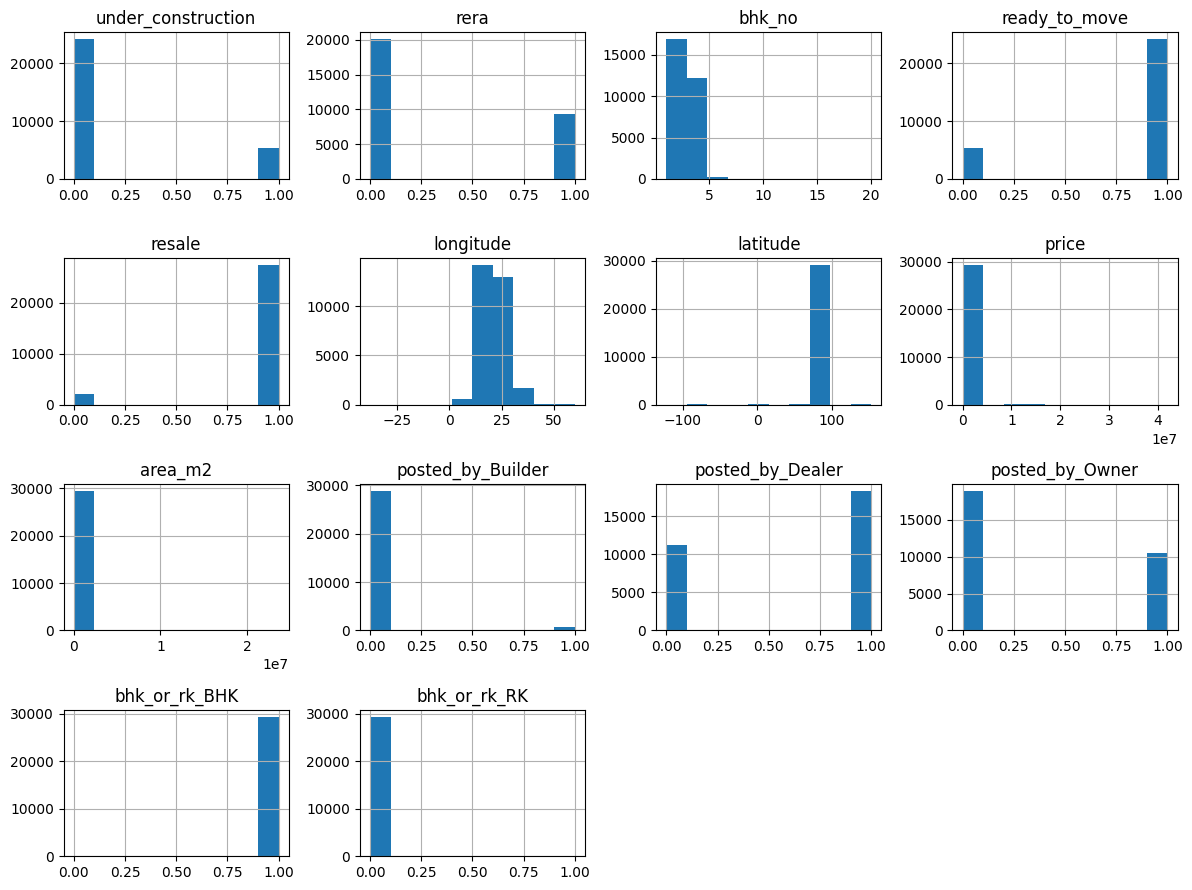

In [90]:
df.hist(figsize=(12,9))
plt.tight_layout()
plt.show()

In [91]:
sns.boxplot(data=df['square_ft'], orient='h')

KeyError: 'square_ft'

### Correlation

In [ ]:
df.corr()

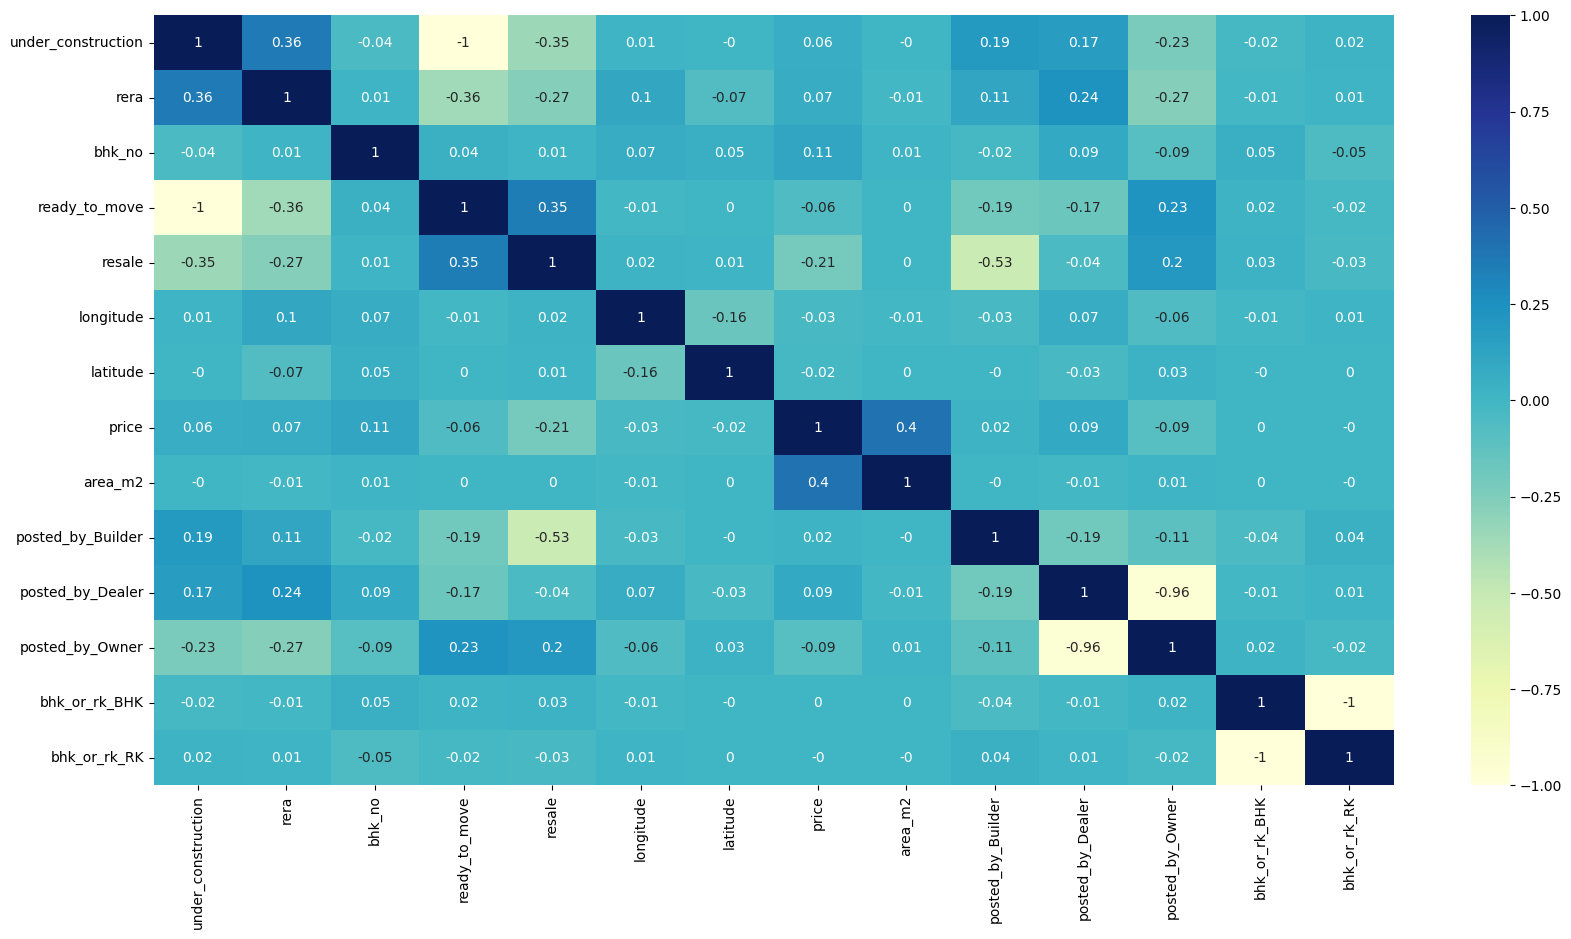

In [92]:

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().round(2), annot=True, cmap='YlGnBu', annot_kws={"size": 10})
#sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [93]:
import matplotlib
print(f'Pandas    : {pd.__version__}')
print(f'Seaborn   : {sns.__version__}')
print(f'Matplotlib: {matplotlib.__version__}')

Pandas    : 2.1.0
Seaborn   : 0.12.2
Matplotlib: 3.7.3


In [94]:
! cat /etc/os-release

NAME="Pop!_OS"
VERSION="22.04 LTS"
ID=pop
ID_LIKE="ubuntu debian"
PRETTY_NAME="Pop!_OS 22.04 LTS"
VERSION_ID="22.04"
HOME_URL="https://pop.system76.com"
SUPPORT_URL="https://support.system76.com"
BUG_REPORT_URL="https://github.com/pop-os/pop/issues"
PRIVACY_POLICY_URL="https://system76.com/privacy"
VERSION_CODENAME=jammy
UBUNTU_CODENAME=jammy
LOGO=distributor-logo-pop-os


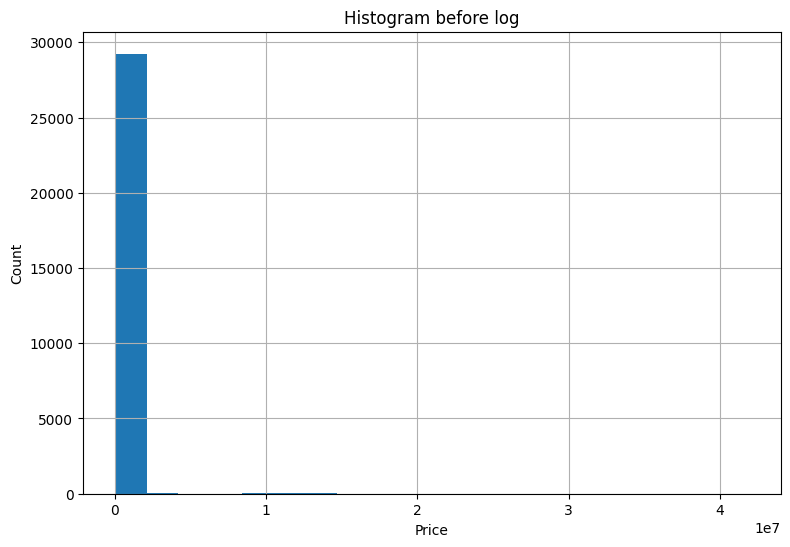

In [96]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title(f'Histogram before log')
ax.set_ylabel('Count')
ax.set_xlabel('Price')
df['price'].hist(bins=20)
plt.show()

In [98]:
df['price'].describe()

count       29,451.00
mean       199,629.55
std        917,662.36
min            349.25
25%         53,086.00
50%         86,614.00
75%        139,700.00
max     41,910,000.00
Name: price, dtype: float64

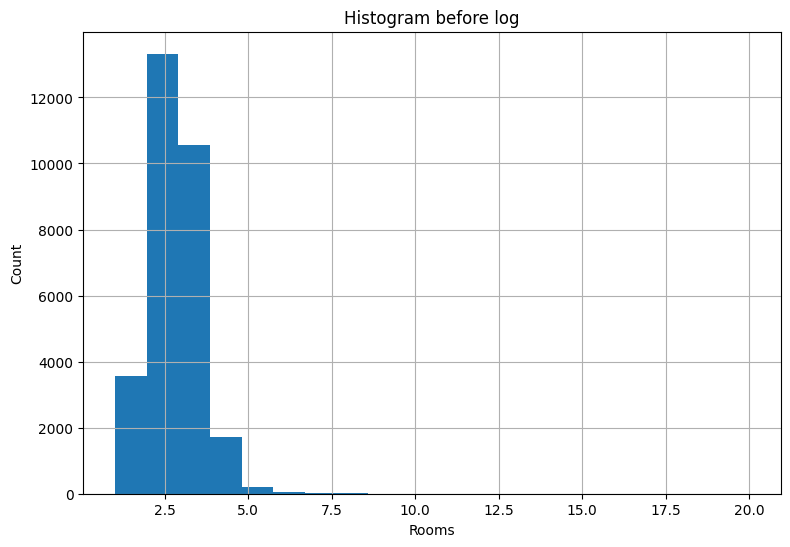

In [99]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title(f'Histogram before log')
ax.set_ylabel('Count')
ax.set_xlabel('Rooms')
df['bhk_no'].hist(bins=20)
plt.show()